In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize, remove_small_objects

In [ ]:
binary_img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)

Original Binary Image:


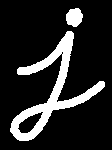

In [ ]:
print("Original Binary Image:")
cv2_imshow(binary_img)


In [ ]:
#Define a single kernel to be used across all operations
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

##Erosion

Eroded Image:


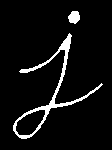

In [ ]:
# Erosion
eroded_img = cv.erode(binary_img, kernel, iterations=1)
print("Eroded Image:")
cv2_imshow(eroded_img)

##Dilation

Dilated Image:


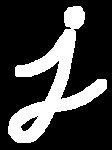

In [ ]:
# Dilation
dilated_img = cv.dilate(binary_img, kernel, iterations=1)
print("Dilated Image:")
cv2_imshow(dilated_img)

#Opening and Closing

Opened Image:


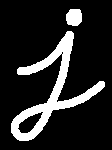

Closed Image:


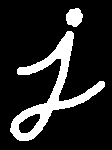

In [ ]:
# Opening
opening_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel, iterations=1)
print("Opened Image:")
cv2_imshow(opening_img)

# Closing
closing_img = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel, iterations=1)
print("Closed Image:")
cv2_imshow(closing_img)

#Skeletonization and removing small objects



Skeletonized Image:


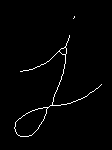

Removed Small Objects:


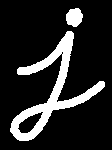

In [ ]:
# Skeletonization
skeleton = skeletonize(binary_img > 0)
skeleton_img = skeleton.astype(np.uint8) * 255
print("Skeletonized Image:")
cv2_imshow(skeleton_img)

# Removing Small Objects
removed_objects = remove_small_objects(binary_img > 0, min_size=200, connectivity=1)
removed_objects_img = removed_objects.astype(np.uint8) * 255
print("Removed Small Objects:")
cv2_imshow(removed_objects_img)

#Boundaries

Boundary (Dilation - Erosion):


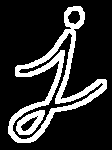

Boundary (Morphological Gradient):


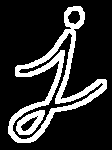

In [ ]:
# Boundary Extraction (using dilate and subtract)
dilated_for_boundary = cv.dilate(binary_img, kernel, iterations=1)
eroded_for_boundary = cv.erode(binary_img, kernel, iterations=1)
boundary_dil_ero = cv.subtract(dilated_for_boundary, eroded_for_boundary)

# Boundary Extraction (using Morphological Gradient)
boundary_gradient = cv.morphologyEx(binary_img, cv.MORPH_GRADIENT, kernel)

print("Boundary (Dilation - Erosion):")
cv2_imshow(boundary_dil_ero)
print("Boundary (Morphological Gradient):")
cv2_imshow(boundary_gradient)